In [1]:
from ase.io import read, write
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import os

from dscribe.descriptors import SOAP
from scipy.spatial.distance import cdist


from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


from sklearn.decomposition import PCA
import hdbscan

import os

In [2]:

r_cut=6
n_max=6
l_max=2
soap = SOAP(
    species=["Au", "Zn", "C", "N", "H", "Cl", "Br", "Na", "O"],
    r_cut=r_cut,
    n_max=n_max,
    l_max=l_max,
    periodic=True
)

In [7]:
mols_final_config=read('/scratch/phys/sin/Nian_Wu/active_both_au_nacl_latest_version/active_MLIP_au/step8_cal_final_sim/all_final_configs_au.xyz', index=':')


# feat_a = soap.create([mol])(axis=0)

# pos_all=[mol.get_positions().flatten() for mol in mols_final_config_order_energy_mols]
# pos_all_array=np.array(pos_all)
# X=pos_all_array.copy()

feat_all=[soap.create([mol]).mean(axis=0) for mol in mols_final_config]
feat_all_array=np.array(feat_all)
X=feat_all_array.copy()

In [8]:
# Cluster

clusterer = hdbscan.HDBSCAN(min_cluster_size=8, metric='euclidean')
labels = clusterer.fit_predict(X)

/home/wun2/miniconda3/envs/boss_active/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/wun2/miniconda3/envs/boss_active/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


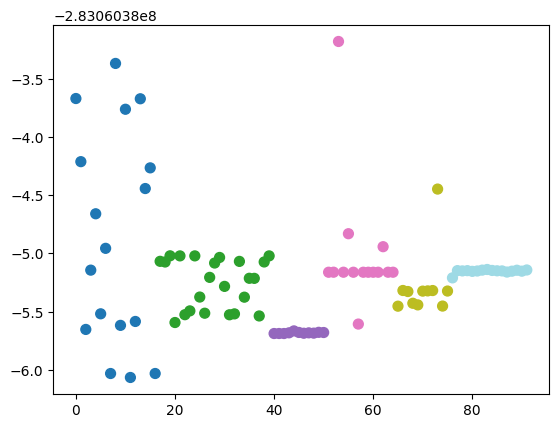

In [9]:
mols_final_config_order_energy_cluster=[mols_final_config[i] for i in np.argsort(labels).tolist()]
energies_ordered_cluster=[mols_final_config[i].get_potential_energy() for i in np.argsort(labels).tolist()]
plt.scatter([i for i in range(len(energies_ordered_cluster))], energies_ordered_cluster, c=labels[np.argsort(labels).tolist()], cmap='tab20', s=50)

In [ ]:
# PCA analysis

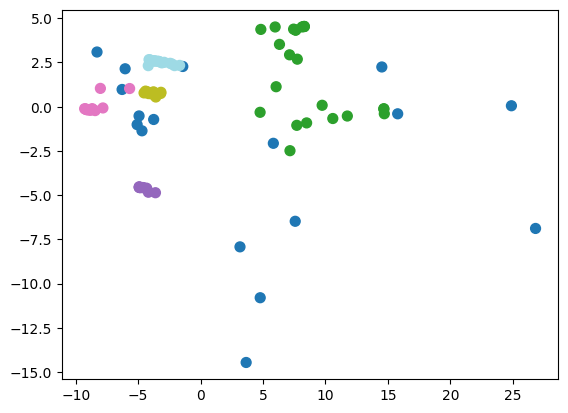

In [10]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='tab20', s=50)

In [22]:
# Selected final stable configs

all_labels=np.unique(labels).tolist()

for cluster_id in all_labels:

    mols_cluster_id=np.where(labels==cluster_id)[0].tolist()


    dissim_matrix=cdist(X[mols_cluster_id], X[mols_cluster_id], metric='euclidean')
    mol_a_id, mol_b_id = int(np.argmax(dissim_matrix)/len(mols_cluster_id)), int(np.argmax(dissim_matrix)%len(mols_cluster_id))
    print(np.argmax(dissim_matrix), mol_a_id, mol_b_id, dissim_matrix.max())


    write('estimated_stable_configs_nacl_top2.xyz', [mols_final_config[mols_cluster_id[mol_a_id]], mols_final_config[mols_cluster_id[mol_b_id]]], format='extxyz', append=True)


11 2 3 7.385925034377012
718 16 30 8.45593137731558
9 0 9 3.695742387468512
83 5 8 0.67310699938561
1331 35 36 2.136084078684819
